In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('test.csv')
test = pd.read_csv('train.csv')

In [4]:
train.shape, test.shape

((9705, 63), (75757, 64))

In [5]:
test.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


In [6]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,id
count,9705.0,9.705000e+03,9613.000000,7451.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,9705.000000,...,9705.000000,9705.000000,9705.000000,9705.000000,9705.0,1130.000000,1130.000000,1130.000000,588.000000,9705.000000
mean,7.0,1.632143e+05,1963.219598,64.712924,205.231190,13.520762,36.678081,60.008449,21.705100,41.634886,...,1.323029,66.820093,11.941267,0.211643,0.0,321.743363,310.194690,18.131327,150.755102,80609.000000
std,0.0,2.624759e+05,40.819953,27.935984,264.822814,12.458365,6.968520,5.874699,9.774624,5.528689,...,2.205729,30.936872,13.077936,0.615250,0.0,19.127690,38.969875,1.993348,58.760576,2801.736515
min,7.0,5.982000e+03,0.000000,1.000000,1.800000,-1.000000,27.548387,42.000000,9.000000,33.428571,...,0.000000,15.000000,1.000000,0.000000,0.0,280.000000,240.000000,14.800000,34.000000,75757.000000
25%,7.0,4.802000e+04,1929.000000,45.000000,26.500000,-1.000000,27.548387,54.000000,9.000000,36.053571,...,0.000000,39.000000,3.000000,0.000000,0.0,310.000000,270.000000,16.500000,129.000000,78183.000000
50%,7.0,8.248600e+04,1969.000000,72.000000,118.900000,15.000000,38.661290,59.000000,22.000000,41.625000,...,0.000000,77.000000,5.000000,0.000000,0.0,330.000000,320.000000,18.300000,129.000000,80609.000000
75%,7.0,1.775200e+05,1994.000000,88.000000,231.300000,21.000000,41.177419,64.000000,28.000000,45.685185,...,5.000000,79.000000,12.000000,0.000000,0.0,340.000000,340.000000,19.200000,138.000000,83035.000000
max,7.0,6.353396e+06,2016.000000,100.000000,812.000000,38.000000,50.596774,71.000000,40.000000,54.482143,...,5.000000,122.000000,41.000000,2.000000,0.0,360.000000,350.000000,23.300000,250.000000,85461.000000


In [7]:
set(test.columns) - set(train.columns)

{'site_eui'}

In [8]:
set(train.columns) - set(test.columns)

set()

In [9]:
test.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [10]:
l0 = train.shape[0]
train.drop_duplicates(inplace=True)
l1 = train.shape[0]
print(f'{l0-l1} rows were dropped.')

0 rows were dropped.


In [11]:
l0 = test.shape[0]
test.drop_duplicates(inplace=True)
l1 = test.shape[0]
print(f'{l0-l1} rows were dropped.')

0 rows were dropped.


In [12]:
def count_missing_values(dataframe):
    
    total = dataframe.isnull().sum()
    percent = (dataframe.isnull().sum())*100/(len(dataframe))
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data['Total']>0]
    missing_data.sort_values('Total', ascending=False, inplace=True)
    print(missing_data)
    
    return 

In [13]:
count_missing_values(test)

                           Total    Percent
days_with_fog              45796  60.451179
direction_peak_wind_speed  41811  55.190939
direction_max_wind_speed   41082  54.228652
max_wind_speed             41082  54.228652
energy_star_rating         26709  35.256148
year_built                  1837   2.424858


In [14]:
count_missing_values(train)

                           Total    Percent
days_with_fog               9117  93.941267
direction_max_wind_speed    8575  88.356517
direction_peak_wind_speed   8575  88.356517
max_wind_speed              8575  88.356517
energy_star_rating          2254  23.225142
year_built                    92   0.947965


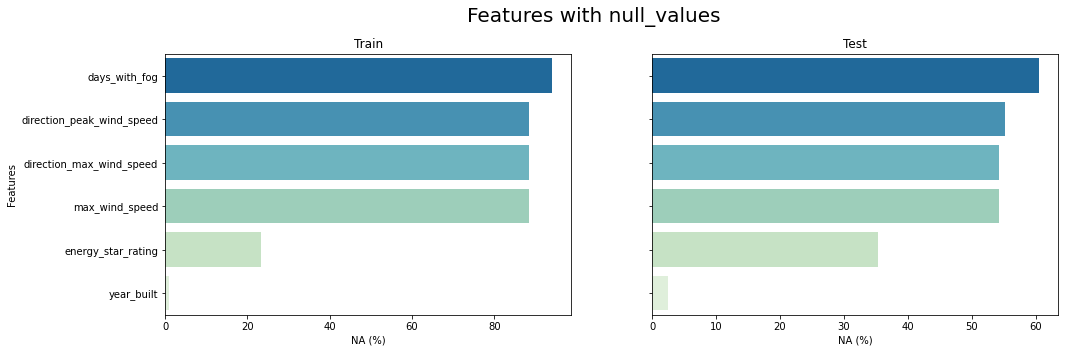

In [15]:
import seaborn as sns

def null_value_df(data):    
    null_values_df = []    
    for col in data.columns:
        
        if data[col].isna().sum() != 0:
            pct_na = np.round((100 * (data[col].isna().sum())/len(data)), 2) 
            
            dict1 ={
                'Features' : col,
                'NA (count)': data[col].isna().sum(),
                'NA (%)': (pct_na)
            }
            null_values_df.append(dict1)
    return pd.DataFrame(null_values_df, index=None).sort_values(by='NA (count)',ascending=False)


df1 = null_value_df(train)
df2 = null_value_df(test)

fig, ax = plt.subplots(1,2, figsize=(16, 5), sharey=True)
fig.subplots_adjust(top=0.85)
sns.barplot(data=df1, y= 'Features', x='NA (%)', ax= ax[0], label='train', palette='GnBu_r')
ax[0].set_title('Train')
sns.barplot(data=df2, y= 'Features', x='NA (%)', ax =ax[1], label='test', palette='GnBu_r')
ax[1].set_title('Test')
ax[1].set_ylabel('')
plt.suptitle('Features with null_values ', fontsize=20);

In [16]:
drop_cols = ['days_with_fog', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed']

In [17]:
train.drop(columns=drop_cols, axis=1, inplace=True)
test.drop(columns=drop_cols, axis=1, inplace=True)

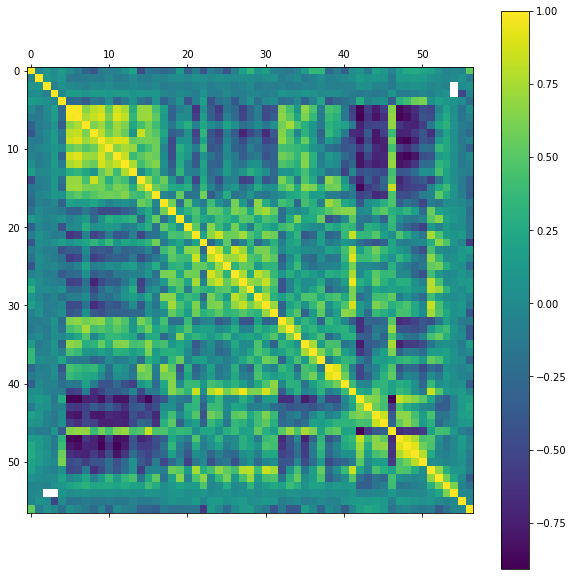

In [18]:
f = plt.figure(figsize=(10, 10))
plt.matshow(test.corr(), fignum=f.number)
plt.colorbar()
plt.show()

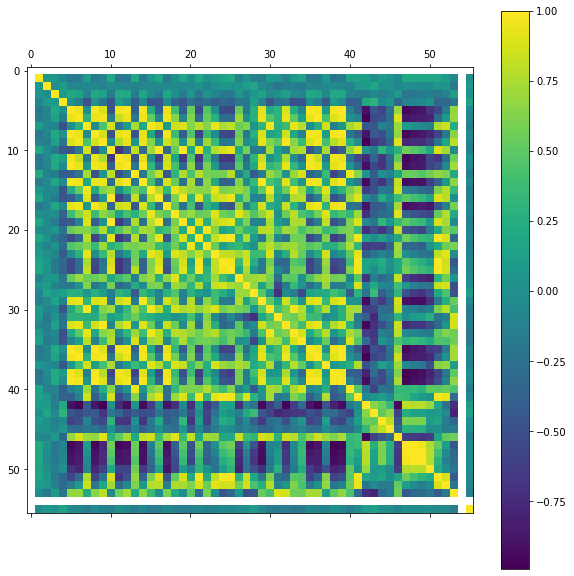

In [19]:
f = plt.figure(figsize=(10, 10))
plt.matshow(train.corr(), fignum=f.number)
plt.colorbar()
plt.show()

In [20]:
def correlation(dataframe, threshold):
    high_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and ((corr_matrix.columns[j], corr_matrix.columns[i]) not in high_corr):
                columns = (corr_matrix.columns[i], corr_matrix.columns[j]) # getting the name of the columns
                high_corr.add(columns)

    return high_corr

high_corr_train = correlation(train, 0.95)
high_corr_test = correlation(test, 0.95)

In [21]:
high_corr_train

{('april_avg_temp', 'january_max_temp'),
 ('april_max_temp', 'february_max_temp'),
 ('april_min_temp', 'january_min_temp'),
 ('april_min_temp', 'march_avg_temp'),
 ('cooling_degree_days', 'july_avg_temp'),
 ('cooling_degree_days', 'july_max_temp'),
 ('cooling_degree_days', 'june_avg_temp'),
 ('days_above_80F', 'cooling_degree_days'),
 ('days_above_80F', 'july_avg_temp'),
 ('days_above_80F', 'july_max_temp'),
 ('days_above_80F', 'june_avg_temp'),
 ('days_below_10F', 'days_below_20F'),
 ('days_below_10F', 'days_below_30F'),
 ('days_below_20F', 'days_below_30F'),
 ('december_avg_temp', 'april_min_temp'),
 ('december_avg_temp', 'december_min_temp'),
 ('december_avg_temp', 'february_min_temp'),
 ('december_avg_temp', 'january_avg_temp'),
 ('december_avg_temp', 'january_min_temp'),
 ('december_avg_temp', 'march_avg_temp'),
 ('december_avg_temp', 'may_min_temp'),
 ('december_avg_temp', 'november_avg_temp'),
 ('december_avg_temp', 'november_min_temp'),
 ('december_max_temp', 'march_max_temp'),

In [22]:
high_corr_test

{('cooling_degree_days', 'august_avg_temp'),
 ('january_avg_temp', 'january_min_temp')}

In [23]:
drop_cols = ['january_min_temp']

In [24]:
train.drop(columns=drop_cols, axis=1, inplace=True)

In [25]:
test.drop(columns=drop_cols, axis=1, inplace=True)

In [26]:
cat_columns = test.dtypes[test.dtypes == "object"].index.tolist()
numerical_columns = test.dtypes[test.dtypes != "object"].index.tolist()
print(cat_columns)

['State_Factor', 'building_class', 'facility_type']


In [27]:
def plot_distbn(column, column_name, num):
    plt.subplot(num)
    column.value_counts(normalize=True).plot(kind='bar')
    plt.title(column_name)
    plt.ylabel('Relative frequency')
    plt.tight_layout()
    plt.grid(True)
    
    return column.value_counts(normalize=True)

/var/folders/cn/lmyg_r6n1pb0srcgmqvgxdgh0000gn/T/ipykernel_23865/687558510.py:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


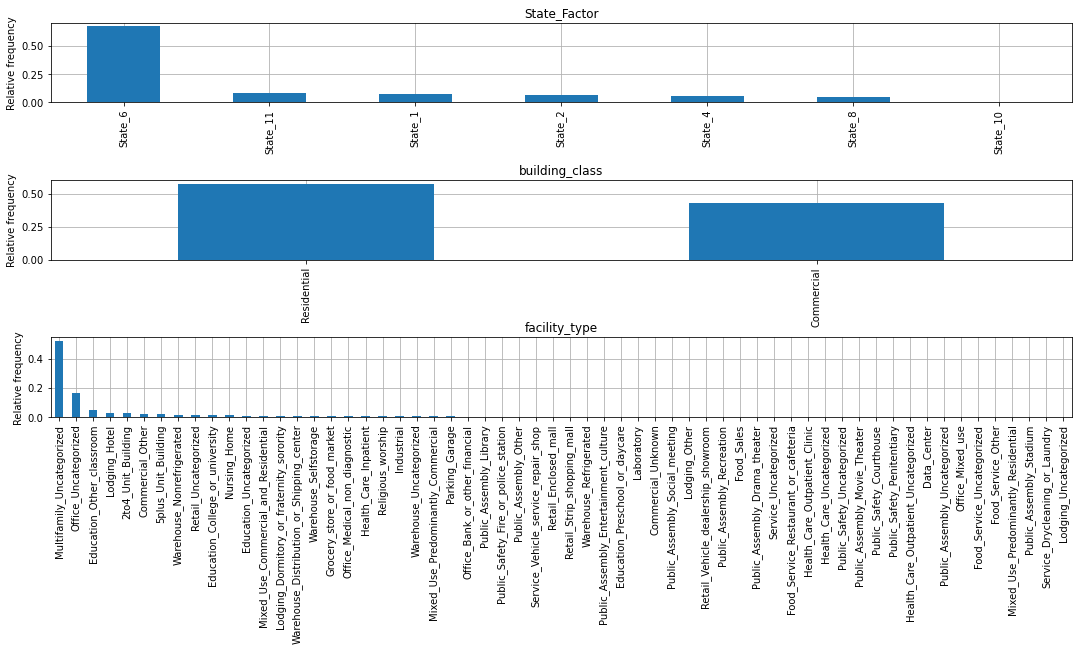

In [245]:
plt.rcParams['axes.axisbelow'] = True
plt.figure(figsize=(15,6))
rel_freqs1 = plot_distbn(test[cat_columns[0]], cat_columns[0], 311)
rel_freqs2 = plot_distbn(test[cat_columns[1]], cat_columns[1], 312)
rel_freqs3 = plot_distbn(test[cat_columns[2]], cat_columns[2], 313)

In [246]:
values = test.groupby('building_class')['site_eui'].agg(sum).values

count = test.groupby('building_class')['site_eui'].size()

keys = test.groupby('building_class')['site_eui'].agg(sum).keys()

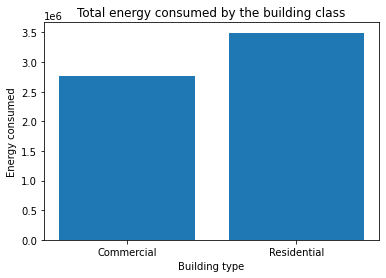

In [247]:
plt.bar(keys, values)
plt.xlabel('Building type')
plt.ylabel('Energy consumed')
plt.title('Total energy consumed by the building class')
plt.show()

In [248]:
per_capita_eui = []
for i in range(2):
    pceui = values[i]/count[i]
    per_capita_eui.append(pceui)

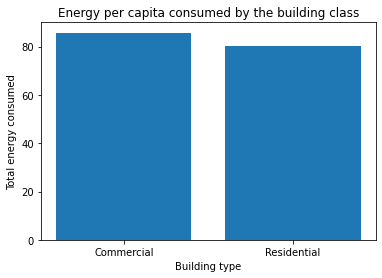

In [249]:
plt.bar(keys, per_capita_eui)
plt.xlabel('Building type')
plt.ylabel('Total energy consumed')
plt.title('Energy per capita consumed by the building class')
plt.show()

In [250]:
test_year_1750 = test[test['year_built']>=1850]

In [251]:
values = test_year_1750.groupby('year_built')['site_eui'].agg(sum).values

count = test_year_1750.groupby('year_built')['site_eui'].size()

keys = test_year_1750.groupby('year_built')['site_eui'].agg(sum).keys()

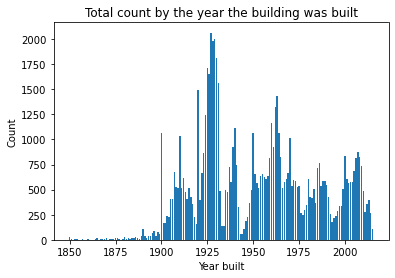

In [252]:
plt.bar(keys, count)
plt.xlabel('Year built')
plt.ylabel('Count')
plt.title('Total count by the year the building was built')
plt.show()

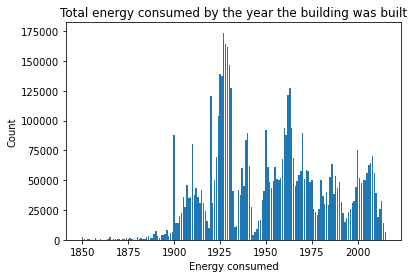

In [253]:
plt.bar(keys, values)
plt.xlabel('Energy consumed')
plt.ylabel('Count')
plt.title('Total energy consumed by the year the building was built')
plt.show()

In [254]:
count = count.values

In [255]:
per_capita_eui = []
for i in range(159):
    pceui = values[i]/count[i]
    per_capita_eui.append(pceui)

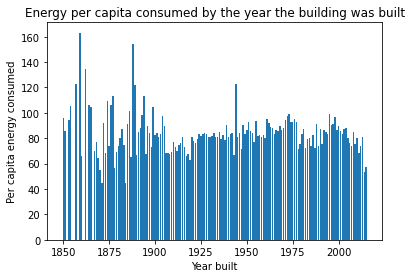

In [256]:
plt.bar(keys, per_capita_eui)
plt.xlabel('Year built')
plt.ylabel('Per capita energy consumed')
plt.title('Energy per capita consumed by the year the building was built')
plt.show()

/Users/kalra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/Users/kalra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


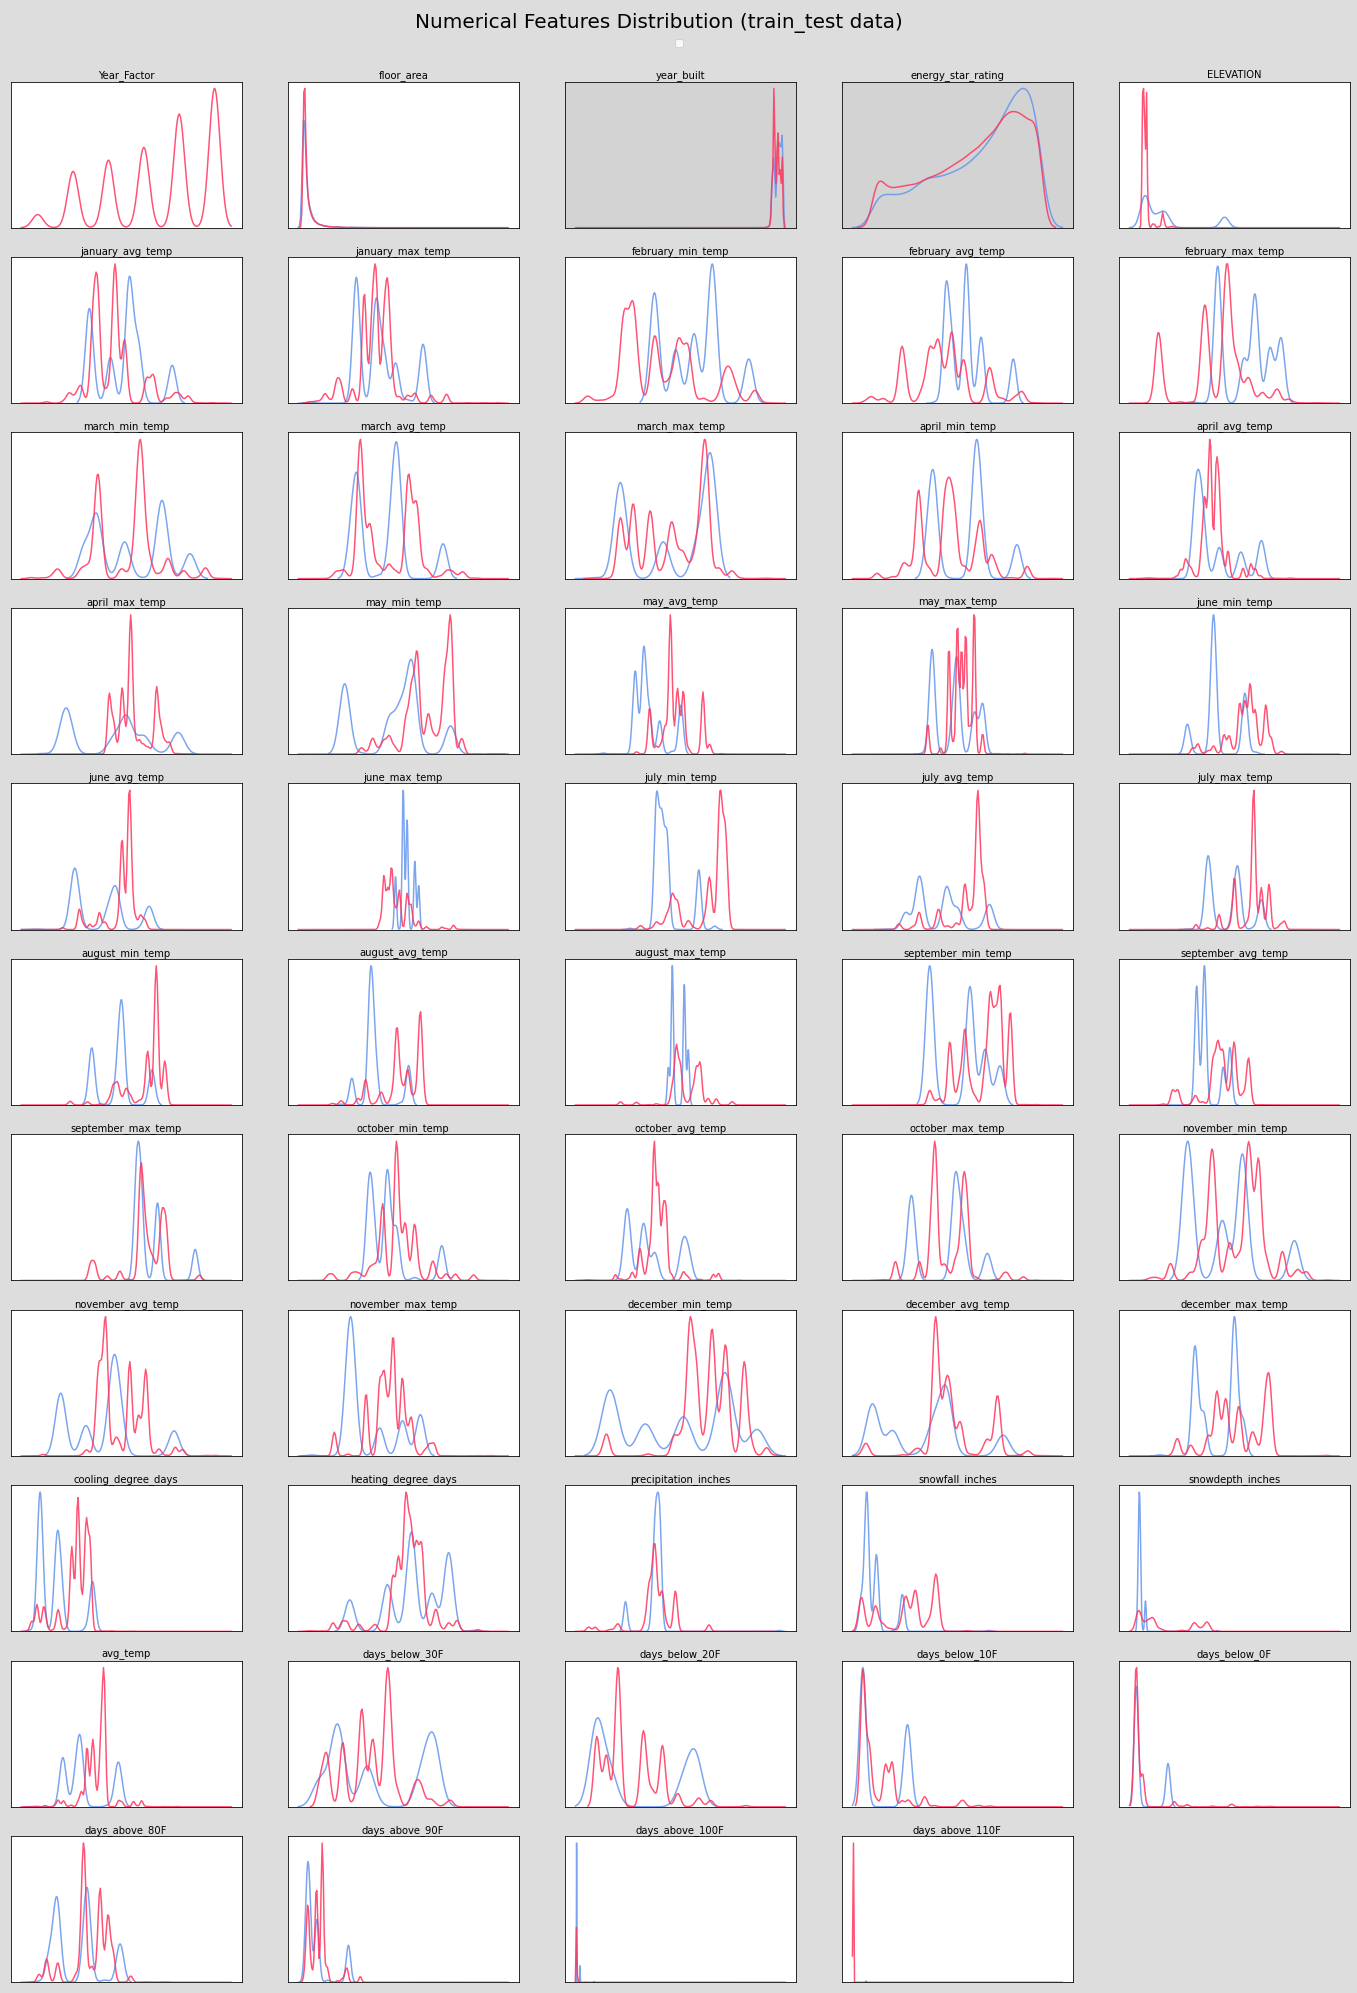

In [286]:
cols_with_na= ['days_with_fog', 'direction_max_wind_speed', 'direction_peak_wind_speed', 'max_wind_speed', 'energy_star_rating', 'year_built', 'site_eui']
cat_features =[]
num_features =[]

from matplotlib.ticker import FormatStrFormatter

for col in test.columns:
    if test[col].dtype=='object':
        cat_features.append(col)
    else:
        num_features.append(col)
def density_plot(train, test, features, title):    
    
    L = len(features)
    ncol= 5
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L
    
    fig, ax = plt.subplots(nrow, ncol,figsize=(24, 32), sharey=False, facecolor='#dddddd')
    ax.flat[-remove_last].set_visible(False)
    fig.subplots_adjust(top=0.95)
    i = 1
    for feature in features:
        plt.subplot(nrow, ncol, i)
        ax = sns.kdeplot(train[feature], shade=False,  color='#6495ED',  alpha=0.85, label='train')
        ax = sns.kdeplot(test[feature], shade=False, color='#ff355d',  alpha=0.85, label='test')
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        ax.xaxis.set_label_position('top')
        ax.set_ylabel('')
        ax.set_yticks([])        
        ax.set_xticks([])
        
        if feature in cols_with_na:
                  
            ax.set_facecolor('lightgray')
                
        i += 1

    lines, labels = fig.axes[-1].get_legend_handles_labels()    
    fig.legend(lines, labels, loc = 'upper center',borderaxespad= 4.0)

    plt.suptitle(title, fontsize=20)
    plt.show()
num_features = num_features[:-2]
test_no_eui = test.drop(columns = ['site_eui'])
density_plot(train, test_no_eui, num_features, title='Numerical Features Distribution (train_test data)');

In [288]:
train.columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type',
       'floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_avg_temp', 'january_max_temp', 'february_min_temp',
       'february_avg_temp', 'february_max_temp', 'march_min_temp',
       'march_avg_temp', 'march_max_temp', 'april_min_temp', 'april_avg_temp',
       'april_max_temp', 'may_min_temp', 'may_avg_temp', 'may_max_temp',
       'june_min_temp', 'june_avg_temp', 'june_max_temp', 'july_min_temp',
       'july_avg_temp', 'july_max_temp', 'august_min_temp', 'august_avg_temp',
       'august_max_temp', 'september_min_temp', 'september_avg_temp',
       'september_max_temp', 'october_min_temp', 'october_avg_temp',
       'october_max_temp', 'november_min_temp', 'november_avg_temp',
       'november_max_temp', 'december_min_temp', 'december_avg_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'precipitation_inches', 'snowfall_inches', 'snowdepth_inc